<a href="https://colab.research.google.com/github/LuziaAm/DataScience/blob/main/Aula2_ML_INDT_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clusterização

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np


In [231]:
#Determinar o numer de clusters
#Obter e salvar o modelo
#Criar um módulo de inferência com os clusters

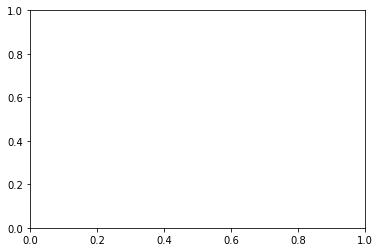

In [232]:
#preparar os objetos para plotar o gráfico
fig, ax = plt.subplots()

In [233]:
dados =  pd.read_csv('/content/iris.csv')

In [234]:
dados=dados.drop(columns='species')#somente ayributos numericos

Obter modelo de Cluusters com a base Iris

In [235]:
dados=dados.values

In [236]:
dados

array([[1. , 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [237]:
kmeansModel = KMeans(n_clusters=3).fit(dados)

In [238]:
Iris_clusters = kmeansModel.fit_transform(dados)

In [239]:
kmeansModel.cluster_centers_ #médias das colunas da petala e cepala

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [4.924     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [240]:
#Descobrir o número ideal de clusters
#Método das distorções
#Dica: Todo método se apoia na avaliação do erro

In [241]:
distorcoes=[]#Matriz para gravar as distorções

In [242]:
k= range(1,11)
for n in k:
  kmeansModel = KMeans(n_clusters=n).fit(dados)
  distorcoes.append(
      sum(np.min(
          cdist(dados, kmeansModel.cluster_centers_,'euclidean'), axis=1)/dados.shape[0]
      )
  )

In [243]:
distorcoes

[1.9618657405842204,
 0.8819856769582625,
 0.676350413034968,
 0.5857046952748558,
 0.5575716736741386,
 0.5094582168492963,
 0.4647021354573805,
 0.4336705325134261,
 0.4119966164371171,
 0.3943798290626821]

In [244]:
ax.plot(k, distorcoes)
ax.set(xlabel='n Clusters', ylabel='Distorcao', title='Elbow por distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show()

In [245]:
#Até aqui caculamos as distorções

#Agora calcular o número de ótimos grupos

In [246]:
#Requisito: Possuir a matriz que representa os erros(distorcoes ou soma dos qradrados)
#Medidas de inercia de cada modelo avaliado

In [247]:
soma_quadrados = [] #vetor com as somas dos quadrados dos erros de cada cluster

In [248]:
k= range(1,100)
for n in k:
  kmeansModel = KMeans(n_clusters=n).fit(dados)
  soma_quadrados.append(kmeansModel.inertia_)

In [249]:
#Definir o n_clusters ótimo

In [250]:
x1 = 2 #é o primeiro valor do intervalo de n_clusters testados
y1 = soma_quadrados[0] #primeira inercia

In [251]:
x2 = 100 #ultimo valor de n_clusters testados
y2 = soma_quadrados[len(soma_quadrados)-1]

In [252]:
import math

In [253]:
distancias = [] #maior distancia
for i in range(len(soma_quadrados)):
  x0 =  i + 2
  y0 = soma_quadrados[i]
  numerador = abs((y2-y1) * x0 - (x2-x1) *y0 + x2 * y1 * x1)
  denominador = math.sqrt((y2-y1)**2 + (x2-x1)**2)
  distancias.append(numerador/denominador)

n_clusters_otimo =  distancias.index(max(distancias)) + 2 # 1 é o deslocamento do primeiro numero de cluster avaliado

In [254]:
distancias

[99.18807225635592,
 172.17858471757654,
 181.33413295357414,
 183.33083287064647,
 184.51276058604577,
 185.01187169112347,
 185.07927024917387,
 184.698922325699,
 184.30988836720132,
 183.63327406069806,
 182.91606960053713,
 182.1020107216491,
 181.33280271418064,
 180.5718925297261,
 179.74620139974112,
 178.91397209127112,
 178.0698220320612,
 177.17896299420917,
 176.2492561159998,
 175.4917433837338,
 174.5732610173953,
 173.6384793641457,
 172.7225513157585,
 171.8134627011172,
 170.9052286465271,
 169.97020350449205,
 169.00436333805882,
 168.08438369587108,
 167.1382974688957,
 166.24456751357943,
 165.28255729928398,
 164.37143471348247,
 163.38739825972362,
 162.4045580341931,
 161.48271523193247,
 160.52129363799807,
 159.5763400581315,
 158.6376050034869,
 157.6279683578604,
 156.7297294678398,
 155.7874688170203,
 154.78793636537299,
 153.85139244901606,
 152.85229769139798,
 151.90771260639337,
 150.932298723094,
 149.9892667608983,
 149.0332644879981,
 148.04984585081

In [255]:
n_clusters_otimo

8

In [255]:
#Obter modelo otimizado de clusters - n_cluster_otimo
#imprimir os centroides do modelo obtido
#salvar o modelo em disco - pickle

In [ ]:
modelo_normalizador = normalizador.fit(distancias)

In [264]:
from pickle import dump #salvar modelo

In [ ]:
dump(modelo_normalizador,open('modelo.pkl','wb'))

In [260]:
from pickle import load

In [262]:
nova_flor = [[4.9,3.7,1.7,0.1]] 

In [ ]:
iris_cluster=load(open('modelo.pkl','rb'))

In [ ]:
iris_cluster.predict(nova_flor)

In [ ]:
iris_cluster.cluster_centers_[n]